### Number of app vs. desktop customer orders over a timeframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\Jane\events.csv', delimiter = ',')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481024 entries, 0 to 481023
Data columns (total 6 columns):
account_guid       481024 non-null object
device_id          480423 non-null object
event_id           481024 non-null object
order_amount       481024 non-null float64
device_type        481024 non-null object
event_timestamp    481024 non-null object
dtypes: float64(1), object(5)
memory usage: 22.0+ MB
None


In [4]:
#transform event timestamp to a string 
df['event_timestamp'] = df['event_timestamp'].apply(lambda x: pd.to_datetime(str(x)))

In [5]:
#parse event timestamp to year day month, set new dateminustime as index for future grouping 
df['date_minus_time'] = df["event_timestamp"].apply( lambda df : 
dt.datetime(year=df.year, month=df.month, day=df.day))

df.set_index(df["date_minus_time"],inplace=True)

In [6]:
#new DF with only columns i want
dfMod = pd.DataFrame(df, columns=['device_type'])
print(dfMod)

                 device_type
date_minus_time             
2017-12-20       android_app
2017-12-20        mobile_web
2017-12-20           ios_app
2017-12-20       android_app
2017-12-20           ios_app
2017-12-20       android_app
2017-12-20        mobile_web
2017-12-20       android_app
2017-12-20       desktop_web
2019-02-11        mobile_web
2019-04-01           ios_app
2019-04-01        mobile_web
2019-04-01        mobile_web
2018-08-29       android_app
2018-08-29           ios_app
2018-08-29        mobile_web
2018-08-29           ios_app
2018-08-29           ios_app
2018-08-29           ios_app
2018-08-29       desktop_web
2018-08-29       desktop_web
2018-08-29       desktop_web
2018-08-29       desktop_web
2018-08-29       desktop_web
2018-08-29       desktop_web
2018-08-29           ios_app
2018-08-29        mobile_web
2018-08-29           ios_app
2018-08-29           ios_app
2018-08-29           ios_app
...                      ...
2018-11-26       android_app
2018-11-26    

In [7]:
#For the unmodified CSV, replace the device type column with web/app
dfMod['device_type'].replace(["desktop_web", 'mobile_web'],['web', 'web'],inplace=True)
dfMod['device_type'].replace(["android_app", 'ios_app'],['app', 'app'],inplace=True)

In [8]:
print(dfMod)

                device_type
date_minus_time            
2017-12-20              app
2017-12-20              web
2017-12-20              app
2017-12-20              app
2017-12-20              app
2017-12-20              app
2017-12-20              web
2017-12-20              app
2017-12-20              web
2019-02-11              web
2019-04-01              app
2019-04-01              web
2019-04-01              web
2018-08-29              app
2018-08-29              app
2018-08-29              web
2018-08-29              app
2018-08-29              app
2018-08-29              app
2018-08-29              web
2018-08-29              web
2018-08-29              web
2018-08-29              web
2018-08-29              web
2018-08-29              web
2018-08-29              app
2018-08-29              web
2018-08-29              app
2018-08-29              app
2018-08-29              app
...                     ...
2018-11-26              app
2018-11-26              app
2018-11-26          

In [9]:
dfMod['desktop'] = dfMod.device_type.map({'app':0, 'web':1})

In [10]:
dfMod['mobile'] = dfMod.device_type.map({'app':1, 'web':0})

print(dfMod)

                device_type  desktop  mobile
date_minus_time                             
2017-12-20              app      0.0     1.0
2017-12-20              web      1.0     0.0
2017-12-20              app      0.0     1.0
2017-12-20              app      0.0     1.0
2017-12-20              app      0.0     1.0
2017-12-20              app      0.0     1.0
2017-12-20              web      1.0     0.0
2017-12-20              app      0.0     1.0
2017-12-20              web      1.0     0.0
2019-02-11              web      1.0     0.0
2019-04-01              app      0.0     1.0
2019-04-01              web      1.0     0.0
2019-04-01              web      1.0     0.0
2018-08-29              app      0.0     1.0
2018-08-29              app      0.0     1.0
2018-08-29              web      1.0     0.0
2018-08-29              app      0.0     1.0
2018-08-29              app      0.0     1.0
2018-08-29              app      0.0     1.0
2018-08-29              web      1.0     0.0
2018-08-29

In [11]:
dfMod.drop(['device_type'], axis=1)

desktop  mobile
date_minus_time                 
2017-12-20           0.0     1.0
2017-12-20           1.0     0.0
2017-12-20           0.0     1.0
2017-12-20           0.0     1.0
2017-12-20           0.0     1.0
2017-12-20           0.0     1.0
2017-12-20           1.0     0.0
2017-12-20           0.0     1.0
2017-12-20           1.0     0.0
2019-02-11           1.0     0.0
2019-04-01           0.0     1.0
2019-04-01           1.0     0.0
2019-04-01           1.0     0.0
2018-08-29           0.0     1.0
2018-08-29           0.0     1.0
2018-08-29           1.0     0.0
2018-08-29           0.0     1.0
2018-08-29           0.0     1.0
2018-08-29           0.0     1.0
2018-08-29           1.0     0.0
2018-08-29           1.0     0.0
2018-08-29           1.0     0.0
2018-08-29           1.0     0.0
2018-08-29           1.0     0.0
2018-08-29           1.0     0.0
2018-08-29           0.0     1.0
2018-08-29           1.0     0.0
2018-08-29           0.0     1.0
2018-08-29           0.0     1.0
2018-08-29           0.0     1.0
...                  ...     ...
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           0.0     1.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0
2018-11-26           1.0     0.0

[481024 rows x 2 columns]

In [12]:
m = dfMod.groupby([pd.TimeGrouper('W')]).sum()
print(m)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


                 desktop  mobile
date_minus_time                 
2017-09-03        1210.0  1845.0
2017-09-10        1822.0  2255.0
2017-09-17        1881.0  2480.0
2017-09-24        2213.0  2723.0
2017-10-01        2084.0  2664.0
2017-10-08        2116.0  2571.0
2017-10-15        2231.0  2736.0
2017-10-22        2206.0  2677.0
2017-10-29        2407.0  2857.0
2017-11-05        2795.0  3529.0
2017-11-12        3190.0  3861.0
2017-11-19        3560.0  4045.0
2017-11-26        4804.0  5626.0
2017-12-03        4810.0  4745.0
2017-12-10        3537.0  4222.0
2017-12-17        2439.0  2868.0
2017-12-24        1213.0  1797.0
2017-12-31        1535.0  2417.0
2018-01-07        2095.0  2805.0
2018-01-14        2169.0  2654.0
2018-01-21        1920.0  2825.0
2018-01-28        1670.0  2608.0
2018-02-04        1955.0  2637.0
2018-02-11        1781.0  2406.0
2018-02-18        1767.0  2466.0
2018-02-25        1905.0  3110.0
2018-03-04        2066.0  3102.0
2018-03-11        2364.0  3168.0
2018-03-18

In [14]:
#QC check. Excluded unknown because small amount and would add noise to data
print(dfMod.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86 entries, 2017-09-03 to 2019-04-21
Freq: W-SUN
Data columns (total 2 columns):
desktop    86 non-null float64
mobile     86 non-null float64
dtypes: float64(2)
memory usage: 2.0 KB
None


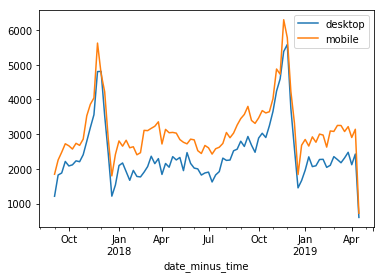

In [15]:
#plot. Add/modify axis labels/plot title
m.plot.line()


[Text(0, 0.5, 'Total order count per week'),
 Text(0.5, 0, 'Week totals starting 09/03/2017 - 04/21/2019')]

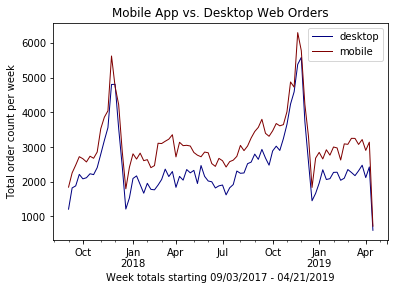

In [16]:
#another way to plot using pyplot
ax = m.plot.line(lw=1, colormap='jet', title='Mobile App vs. Desktop Web Orders')

ax.set(xlabel="Week totals starting 09/03/2017 - 04/21/2019", ylabel="Total order count per week")

<Figure size 432x288 with 0 Axes>

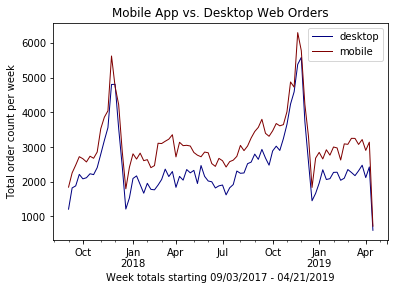

In [17]:
#using matplotlib to plot
plt.figure()
m.plot(lw=1, colormap='jet', title='Mobile App vs. Desktop Web Orders')
plt.xlabel('Week totals starting 09/03/2017 - 04/21/2019')
plt.ylabel('Total order count per week')
plt.show()